In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from tqdm import tqdm

In [2]:
import keras
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Class names and class labels. 
# If ImageDataGen is used no need to give this seperately
class_names = ['Covid','Normal']
class_labels = {'Covid':1,'Normal':0}
img_size = (224,224)

In [5]:
# define the path of the train and test data
paths = ['/content/drive/My Drive/Covid/Train','/content/drive/My Drive/Covid/Val']

In [6]:
#list the folders in each path
os.listdir(paths[0]),os.listdir(paths[1])

(['Normal', 'Covid'], ['Normal', 'Covid'])

In [7]:
# os.path.join function takes 2 parameters. 
# one is the path name of the file, 2nd is the txt
# It joins the txt to the path to create a new path
os.path.join(paths[0],'Covid')

'/content/drive/My Drive/Covid/Train/Covid'

In [8]:
# Now use os.listdir() to display the images in the new path
# print first 5 images
os.listdir(os.path.join(paths[0],'Covid'))[:5]

['7-fatal-covid19.jpg',
 '1-s2.0-S1684118220300682-main.pdf-003-b1.png',
 '1-s2.0-S1684118220300682-main.pdf-003-b2.png',
 'auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'ryct.2020200034.fig5-day7.jpeg']

In [9]:
# process each image by looping over
def process_img(paths):
    output = []
    
    ## iterate thru train and val
    for path in paths:
        
        images = []
        labels = []
        print('Loading Started for',path)
        
        #iterate thru each folder in 'path' [Train and Val]
        for folder in os.listdir(path):
            label = class_labels[folder] # append 0 for 'Normal', 1 for Covid
            
            # iterate thru each image in folder to process it
            
            for file in tqdm(os.listdir(os.path.join(path,folder))):
            
                # path of the file
                img_path = os.path.join(path,folder,file)
                
                # open and resize the image
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image = cv2.resize(image,img_size)
                
                #for each image append the image to images and the label to labels.
                # this will make sure that the Images list and labels list have all images both covid and normal
                images.append(image)
                labels.append(label)
                
        images = np.array(images,dtype='float32')
        labels = np.array(labels,dtype='int32')
        
        output.append((images,labels)) ## executes twice. images and labels for train and images and labels for test
        
    return output # returns 2 tuples with (train images, train labels) and (test images, test_labels)
    # (a,b),(c,d) = ((1,2),(3,4))

In [10]:
(train_images,train_labels), (test_images, test_labels) = process_img(paths)

  0%|          | 0/112 [00:00<?, ?it/s]

Loading Started for /content/drive/My Drive/Covid/Train


  0%|          | 0/30 [00:00<?, ?it/s]

Loading Started for /content/drive/My Drive/Covid/Val


100%|██████████| 30/30 [00:13<00:00,  2.30it/s]


In [11]:
# check the shape
train_images.shape, test_images.shape

((224, 224, 224, 3), (60, 224, 224, 3))

In [12]:
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [13]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [14]:
## We need to shuffle them as they are in order
train_images,train_labels = shuffle(train_images,train_labels,random_state=0)
test_images,test_labels = shuffle(test_images,test_labels,random_state=0)

In [15]:
# normalize 
train_images = train_images / 255.0
test_images = test_images / 255.0

In [16]:
len(train_images)

224

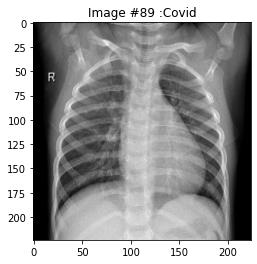

In [17]:
## Display a random image from train
index = np.random.randint(0,224)
plt.figure()
plt.imshow(train_images[index])
plt.title('Image #{} :'.format(index) + class_names[train_labels[index]])
plt.show()

In [18]:
train_images.shape

(224, 224, 224, 3)

In [19]:
## Tranfer Learning with VGG16

## Imagenet is an image classification problem where there are 1000 classes. There are multiple models to do this task. 
###Eg: VGG16, Resnet, Mobilenet, 

# creating an object of vgg16 excluding the last layer
# input shape 
vgg = VGG16(input_shape=(224,224) + (3,), weights='imagenet', include_top=False)


58892288/58889256 [==============================] - 0s 0us/step


In [20]:
layers = vgg.layers  ## include top = False, does not include the last fully connected layers
layers

In [21]:
# no need to train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [22]:
vgg.output  # this shows the last layer of our vgg model. SInce the actual output layre is omitted, vgg.output gives the last pooling layer

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [23]:
## Flatten the output layer to pass it thru our fully connected layer

flat = Flatten()(vgg.output)
flat

<KerasTensor: shape=(None, 25088) dtype=float32 (created by layer 'flatten')>

In [24]:
## adding our own output layer with 1 neuron over the flat layer

output = Dense(1,activation='sigmoid')(flat)

In [25]:
## creating a model out of this

model = Model(inputs=vgg.input, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [26]:
# compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
train_images[0].shape

(224, 224, 3)

In [28]:
# fit the model
model.fit(train_images,train_labels,batch_size = 32, epochs=10,validation_split=0.15)

Epoch 1/10
6/6 [==============================] - 46s 2s/step - loss: 0.5981 - accuracy: 0.6610 - val_loss: 0.1174 - val_accuracy: 1.0000
Epoch 2/10
6/6 [==============================] - 1s 155ms/step - loss: 0.1395 - accuracy: 0.9598 - val_loss: 0.0465 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 1s 154ms/step - loss: 0.0521 - accuracy: 0.9893 - val_loss: 0.0361 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 1s 156ms/step - loss: 0.0381 - accuracy: 0.9965 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 1s 154ms/step - loss: 0.0142 - accuracy: 0.9965 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 1s 154ms/step - loss: 0.0125 - accuracy: 0.9965 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 1s 158ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 8/10
6/6 [======

In [29]:
## evaluate the model

accuracy = model.evaluate(test_images,test_labels)
accuracy

2/2 [==============================] - 6s 5s/step - loss: 0.0369 - accuracy: 0.9667


[0.036906056106090546, 0.9666666388511658]

In [31]:
## Prediction of test_images

pred = model.predict(test_images)
pred = [ 1 if p > 0.5 else 0 for p in pred] # since output is from sigmoid, we will just get one probability for each image
pred

[0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1]

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
# accuracy score
accuracy_score(pred,test_labels)

0.9666666666666667

In [33]:
# confusion matrix
confusion_matrix(test_labels,pred)

array([[28,  2],
       [ 0, 30]])

In [ ]:
## After using VGG16, the validation accuracy was 100%. But the test accuracy remains same as of the model without using VGG16.
